# Exploratory Data Analysis using Habermaan DataSet


### Data Set
 - Age of patient at time of operation (numerical)
 - Patient's year of operation (year - 1900, numerical)
 - Number of positive axillary nodes detected (numerical)
 - Survival status (class attribute)
    - 1 = the patient survived 5 years or longer
    - 2 = the patient died within 5 year
    
    *Source*  :- https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival


In [1]:
# import all the useful package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read Haberman CSV file
haberman = pd.read_csv('haberman.csv')
#Columns are not assigned names.Therefore assigning names as per data mentioned above.
haberman.columns = ['Age of Patient','Year of operation','Axillary Nodes','Survival Nodes']





In [8]:
# Shape of data Set (Row,Coulmn)
Shape_of_DataSet = haberman.shape


In [10]:
# List of data Types
haberman.dtypes

Age of Patient       int64
Year of operation    int64
Axillary Nodes       int64
Survival Nodes       int64
dtype: object

In [4]:
#date points per class
haberman['Survival Nodes'].value_counts()

1    224
2     81
Name: Survival Nodes, dtype: int64

## Observations :

   - In habermans dataset we have 305 datapoints and 3 features + 1 Class label.
   - Feature are Age of Patient,Year of operation,Axillary Nodes
   - Class label is Survival Node and it has two values 1 and 2
       - 1 = the patient survived 5 years or longer
       - 2 = the patient died within 5 year
   - Survival Node with value "1" has 224 data points
   - Survival Node with value "2" has 81 data points
   - Therefore, this is an imbalanced dataset because the number of datapoints in class label is not same. 
   


## Objective : 
- Classification of patients based two criteria:-
    -  "Patient survived 5 years or longer"
    -  "Patient died within 5 year"
    

## Bi-Variate analysis
 Here we will use two Plots :
 - Scatter plots
 - Pair plots

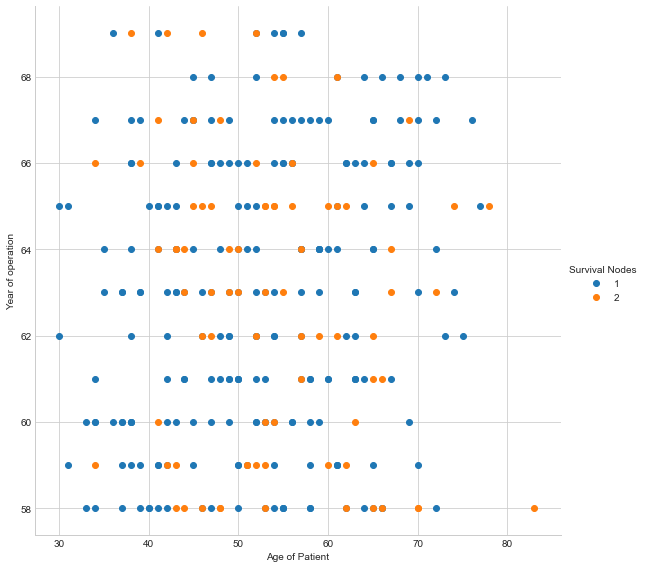

In [16]:
'''
Scatter Plot :  Using Seaborn Package(sns)
X-axis = 'Age of Patient'
Y-axis = 'Year of operation'
'''

sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Survival Nodes',size=8) \
    .map(plt.scatter,'Age of Patient','Year of operation') \
    .add_legend()

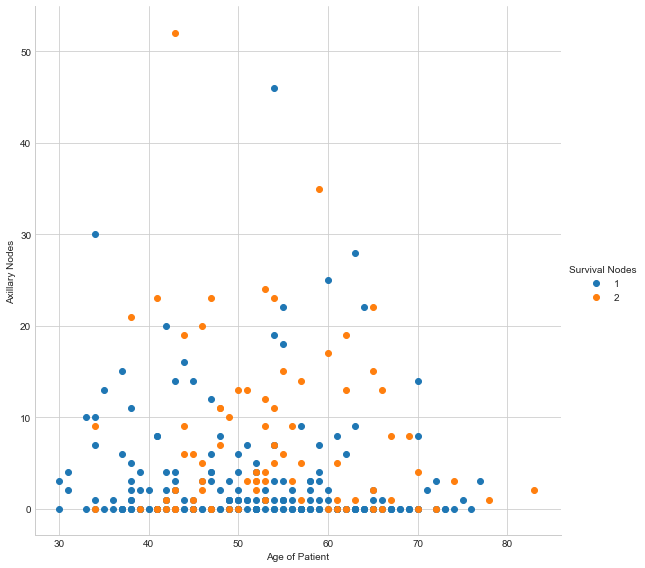

In [11]:
'''
Scatter Plot :  Using Seaborn Package(sns)
X-axis = 'Age of Patient'
Y-axis = 'Axillary Nodes'
'''
sns.set_style("whitegrid")
haberman_sp = sns.FacetGrid(haberman,hue='Survival Nodes',size=8) 
haberman_sp = haberman_sp.map(plt.scatter,'Age of Patient','Axillary Nodes') 
haberman_sp = haberman_sp.add_legend()

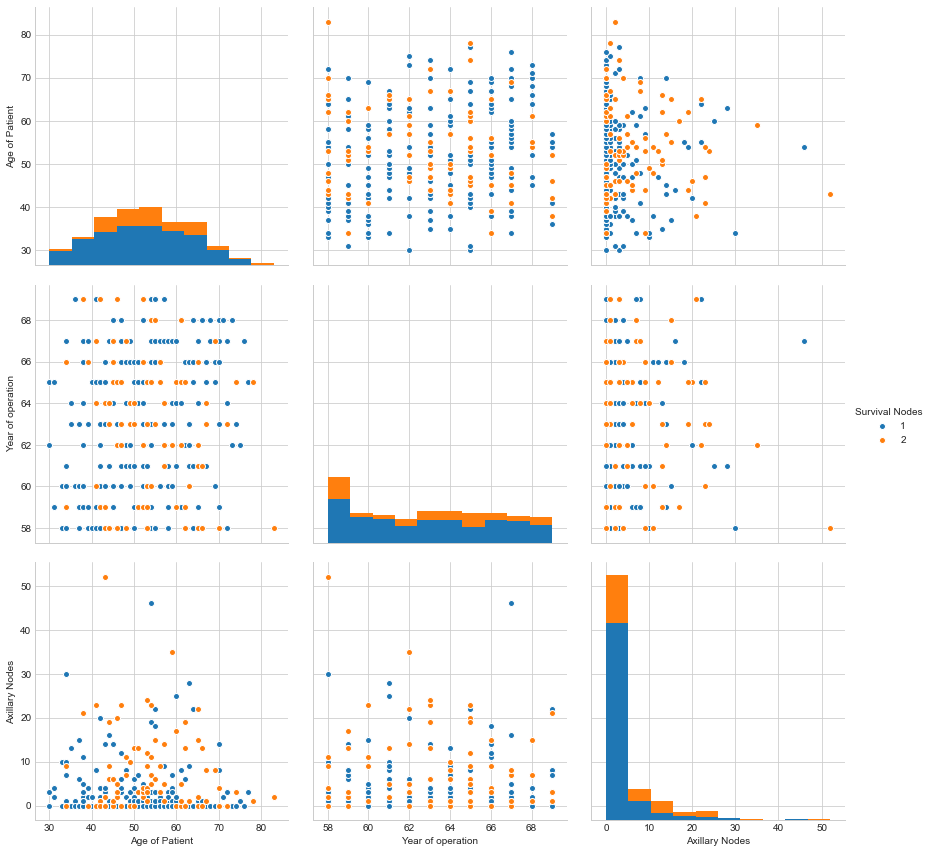

In [25]:
'''
Pair-plots :  Using Seaborn Package(sns)
Ploting pair-plot for three features('Age of Patient','Year of operation','Axillary Nodes')
Therefore we get 6 pair plots
'''
haberman_pp = sns.pairplot(haberman,hue='Survival Nodes',vars=['Age of Patient','Year of operation','Axillary Nodes'] ,size=4)
haberman_pp


## Bi-Variate Analysis Observation
 - Scatter Plot
     - Here survival nodes are scattered.We cannont make inferences from 2 plots
     
 - Pair Plot
     - Here we cannot make any observations since the Survival Nodes are scatered.
     - Since the data is scattered we cannot write if-else condition
     - Diagonal show univariate distribution of data. 

## Univariate Analysis
  Here we will use PDF,CDF,Box Plot,Violin Plots to undertand classification

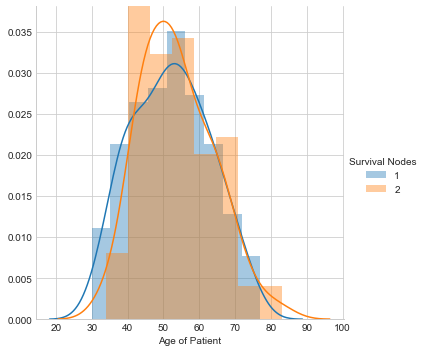

In [10]:
'''
PDF: Probability Distribution Fuction
X-Axis : Age of Patient
'''
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='Survival Nodes',size=5)\
    .map(sns.distplot,'Age of Patient')\
    .add_legend()
    

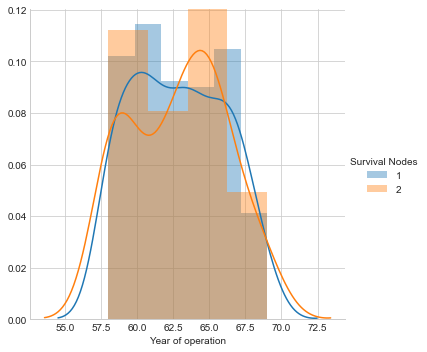

In [15]:
'''
PDF: Probability Distribution Fuction
X-Axis : Year of operation
'''
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='Survival Nodes',size=5)\
    .map(sns.distplot,'Year of operation')\
    .add_legend()

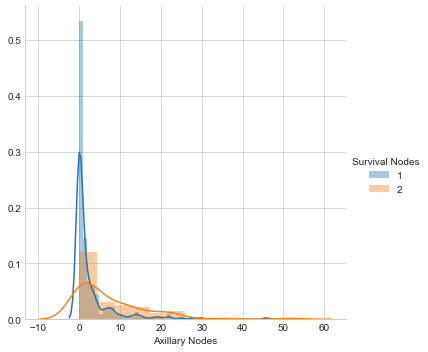

In [14]:
'''
PDF: Probability Distribution Fuction
X-axis : Axillary Nodes
'''
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='Survival Nodes',size=5)\
    .map(sns.distplot,'Axillary Nodes')\
    .add_legend()


## Observations
 - Using 'Age of Patient' as X-axis :
     - Difficult to predict any model because both the PDF's are ALMOST same.
 - Using 'Year of operation' as X-axis :
     - Difficult to predict any model because both the PDF's are ALMOST same.
 - Using 'Axillary Nodes' as X-asis:
     - We can predict model for Survival Node = 1 but when one curve ovelaps another it becomes difficult to make conclusions.   
     - Model : 
         - if(Axillary Nodes > 0.07 AND Axillary Nodes < 0.3) then Survival Node = 1
         

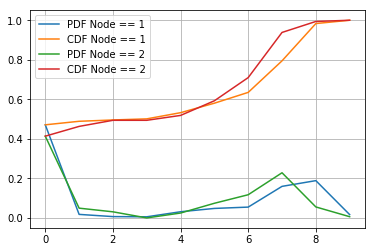

In [3]:
'''
CDF: Cummulative Distribution Fuction
'''
# Survival_Nodes ==1
Survival_Nodes_1 = haberman[haberman['Survival Nodes'] == 1]
counts_1,bin_edges_1 = np.histogram(Survival_Nodes_1,bins=10,density=True)

pdf_1 = counts_1/sum(counts_1)
cdf_1 = np.cumsum(pdf_1)

plt.plot(pdf_1,label='PDF Node == 1')
plt.plot(cdf_1,label='CDF Node == 1')


# Survival_Nodes ==2
Survival_Nodes_2 = haberman[haberman['Survival Nodes'] == 2]
counts_2,bin_edges_2 = np.histogram(Survival_Nodes_2,bins=10,density=True)

pdf_2 = counts_2/sum(counts_2)
cdf_2 = np.cumsum(pdf_2)

plt.plot(pdf_2,label='PDF Node == 2')
plt.plot(cdf_2,label='CDF Node == 2')
plt.legend()
plt.grid()
plt.show()

## Mean and Std-dev

In [4]:
#Mean and Std-dev

print('Mean when Survival_Nodes == 1')
print(np.mean(Survival_Nodes_1['Axillary Nodes']))

#Survival_Nodes_2['Axillary Nodes']
print('Mean when Survival_Nodes == 2')
print(np.mean(Survival_Nodes_2['Axillary Nodes']))

#std-dev
print('\nStd-dev when Survival_Nodes == 1')
print(np.std(Survival_Nodes_1['Axillary Nodes']))

print('Std-dev when Survival_Nodes == 2')
print(np.std(Survival_Nodes_2['Axillary Nodes']))

Survival_Nodes_2


Mean when Survival_Nodes == 1
2.799107142857143
Mean when Survival_Nodes == 2
7.45679012345679

Std-dev when Survival_Nodes == 1
5.869092706952767
Std-dev when Survival_Nodes == 2
9.128776076761632


,Age of Patient,Year of operation,Axillary Nodes,Survival Nodes
6,34,59,0,2
7,34,66,9,2
23,38,69,21,2
33,39,66,0,2
42,41,60,23,2
43,41,64,0,2
44,41,67,0,2
52,42,69,1,2
53,42,59,0,2
61,43,58,52,2


## Median, Percentile, IQR, MAD

In [5]:
#Median
print('Median : ')
print(np.median(Survival_Nodes_1['Axillary Nodes']))
print(np.median(Survival_Nodes_2['Axillary Nodes']))

#Percentile

print('\nPercentile :  ')
print('0th 25th 50th 75th')
print(np.percentile(Survival_Nodes_1['Axillary Nodes'],range(1,100,25)))
print(np.percentile(Survival_Nodes_2['Axillary Nodes'],range(1,100,25)))


#90th Percentile
print('\n90th Percentile : Survival_Nodes == 1 ')
print(np.percentile(Survival_Nodes_1['Axillary Nodes'],90))
#95th Percentile
print('\n95th Percentile : Survival_Nodes == 1')
print(np.percentile(Survival_Nodes_1['Axillary Nodes'],95))

#90th Percentile
print('\n90th Percentile : Survival_Nodes == 2')
print(np.percentile(Survival_Nodes_2['Axillary Nodes'],90))
#95th Percentile
print('\n95th Percentile : Survival_Nodes == 2')
print(np.percentile(Survival_Nodes_2['Axillary Nodes'],95))


# MAD : Median Absolute Deviation
from statsmodels import robust
print('\nMAD : ')
print(robust.mad(Survival_Nodes_1['Axillary Nodes']))
print(robust.mad(Survival_Nodes_2['Axillary Nodes']))




Median : 
0.0
4.0

Percentile :  
0th 25th 50th 75th
[0. 0. 0. 3.]
[ 0.   1.   4.  11.8]

90th Percentile : Survival_Nodes == 1 
8.0

95th Percentile : Survival_Nodes == 1
14.0

90th Percentile : Survival_Nodes == 2
20.0

95th Percentile : Survival_Nodes == 2
23.0

MAD : 
0.0
5.930408874022408


## Box-Plots and Whiskers

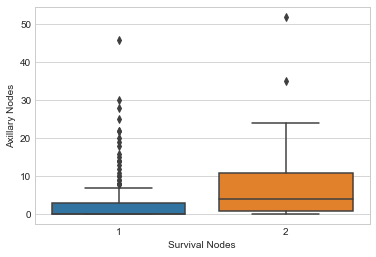

In [33]:
#BoxpLots

sns.boxplot(x='Survival Nodes',y='Axillary Nodes',data=haberman)

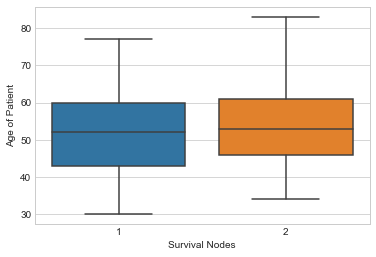

In [34]:
#BoxpLots
sns.boxplot(x='Survival Nodes',y='Age of Patient',data=haberman)


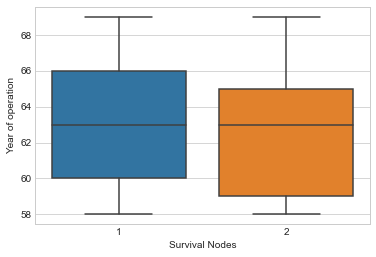

In [22]:

sns.boxplot(x='Survival Nodes',y='Year of operation',data=haberman)

## Observations
 - Here we plotted 3 box-plots:
     - when x='Survival Nodes',y='Axillary Nodes'
          - There are many outliers.
          - For survival nodes == 2 most of the value lie between 50th and 75th quartile
     - when x='Survival Nodes',y='Age of Patient'
          - For both the survival nodes most of the value lie between 25th and 75th quartile
     - when x='Survival Nodes',y='Year of operation'
          - For Survival Nodes == 2 most of the value lie between 25th and 50th quartile.

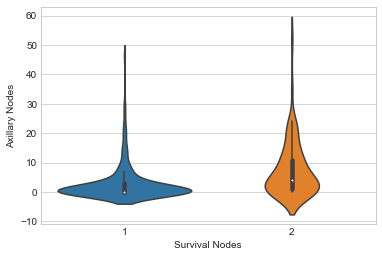

In [20]:
sns.violinplot(x='Survival Nodes',y='Axillary Nodes',data=haberman,size=8)

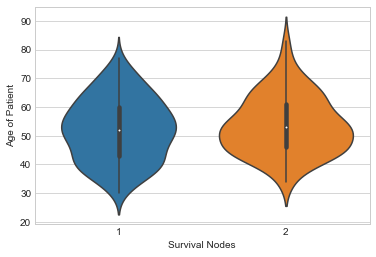

In [26]:
sns.violinplot(x='Survival Nodes',y='Age of Patient',data=haberman,size=8)

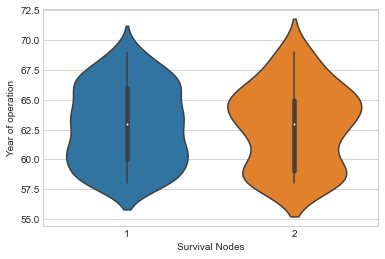

In [24]:
sns.violinplot(x='Survival Nodes',y='Year of operation',data=haberman,size=8)

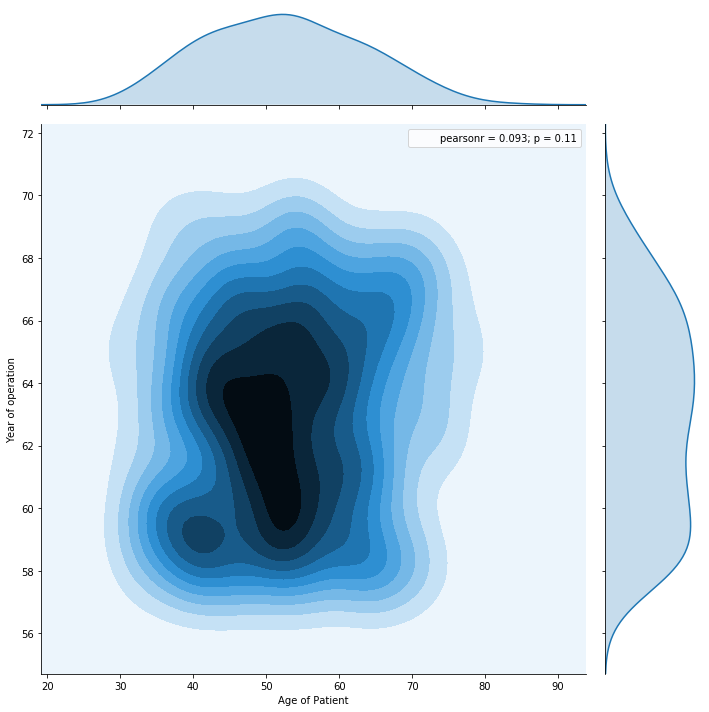

In [10]:
          #'Age of Patient','Year of operation','Axillary Nodes','Survival Nodes']  
sns.jointplot(data=haberman,x='Age of Patient',y='Year of operation',kind='kde',size=10)

## Observation : 
 - Most of the patient have operation between 1958 and 1964 and there age is between 50 and 60